In [5]:
import pandas as pd 

data = pd.read_csv('data/messwerte_haertepruefung.csv', skiprows=4)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   HU          53 non-null     int64  
 1   F           53 non-null     float64
 2   F nach T    53 non-null     float64
 3   h           53 non-null     float64
 4   CHU         53 non-null     float64
 5   h(max)      53 non-null     float64
 6   h(min)      53 non-null     float64
 7   W(plast)    53 non-null     float64
 8   W(elast)    53 non-null     float64
 9   Nu          53 non-null     float64
 10  Rockwell    53 non-null     object 
 11  Haertewert  53 non-null     float64
dtypes: float64(10), int64(1), object(1)
memory usage: 5.1+ KB


Der Datensatz enthält 53 Einträge und stellt somit einen sehr kleinen Datensatz
dar. Es gibt 12 Eigenschaften/Spalten. Die Spalte HU wird durch Integers
repräsentiert, die Eigenschaft Rockwell durch Objekte. Alle übrigen
Eigenschaften werden durch Floats dargestellt. Alle Einträge sind gültig.

In [6]:
data.head(10)

,HU,F,F nach T,h,CHU,h(max),h(min),W(plast),W(elast),Nu,Rockwell,Haertewert
0,775,380.4,392.3,136.283,4.76,142.8,125.4,18.409,-1.075,-6.20,HRB,19.80
1,6391,380.6,392.4,47.466,2.54,48.7,33.5,4.318,1.470,25.40,HRC,65.72
2,1146,380.3,392.4,112.067,5.08,117.8,109.2,15.873,-1.506,-10.49,HRB,54.86
3,4875,380.7,392.3,54.363,2.69,55.8,41.9,5.630,1.084,16.14,HRC,52.88
4,2964,380.5,392.3,69.704,3.30,72.0,60.1,8.281,0.369,4.26,HRC,30.50
5,4817,380.8,392.3,54.698,2.72,56.2,41.8,5.815,0.993,14.58,HRC,51.00
6,1082,380.2,392.3,115.318,5.15,121.3,112.4,16.487,-1.638,-11.03,HRB,48.66
7,5595,380.7,392.2,50.741,2.44,52.0,37.2,4.712,1.392,22.81,HRC,62.76
8,6177,380.4,392.3,48.272,2.56,49.5,34.2,4.438,1.522,25.53,HRC,63.90
9,2958,380.7,392.3,69.784,3.20,72.0,60.5,8.305,0.401,4.60,HRC,29.72


Die Größenordnung der Messwerte ist sehr unterschiedlich, die Daten müssen
später skaliert werden. Die Spalte Rockwell scheint nur zwei verschiedene Werte
zu enthalten, nämlich HRB und HRC. Das muss noch überprüft werden.

Wir trennen jetzt schon Input-Daten von den Output-Daten, um leichter die
statistischen Kennzahlen zu ermitteln und zu visualisieren.



In [11]:
y_Rockwell = data['Rockwell'].copy()
y_Haertewert = data['Haertewert'].copy()

data.drop(columns=['Rockwell', 'Haertewert'], inplace=True)

In [12]:
data.describe()

,HU,F,F nach T,h,CHU,h(max),h(min),W(plast),W(elast),Nu
count,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000,53.000000
mean,2975.094340,380.575472,392.309434,79.970358,3.578491,83.052830,70.990566,10.047623,0.032604,3.685472
std,1816.966738,0.213853,0.049085,24.114821,0.841858,25.664999,27.080778,4.135247,0.992316,11.796490
min,775.000000,380.200000,392.200000,47.124000,2.440000,48.400000,33.500000,4.297000,-1.638000,-11.030000
25%,1319.000000,380.400000,392.300000,54.698000,2.720000,56.200000,41.900000,5.815000,-0.852000,-6.400000
50%,2402.000000,380.600000,392.300000,77.403000,3.510000,80.300000,68.700000,9.671000,0.056000,0.570000
75%,4817.000000,380.700000,392.300000,104.466000,4.230000,108.700000,99.300000,14.054000,1.016000,14.580000
max,6488.000000,381.100000,392.400000,136.283000,5.150000,142.800000,125.400000,18.409000,1.522000,26.050000


In [14]:
import plotly.express as px

fig = px.box(data,
             title='Messung Härtewerte: Eigenschaften',
             labels={'variable': 'Eigenschaft', 'value': 'Wert'})
fig.show()

Auf eine detaillierte explorative Datenanalyse der Input-Daten verzichten wir hier. Wir betrachten aber noch die Output-Daten.

In [17]:
y_Rockwell.unique()


array(['HRB', 'HRC'], dtype=object)

Unsere Hypothese wird bestätigt, es gibt nur zwei verschiedene Werte: HRB und
HRC. Kommen beide Typen ungefähr gleich häufig vor?

In [18]:
y_Rockwell.value_counts()

HRB    29
HRC    24
Name: Rockwell, dtype: int64

Es sind etwas mehr Messungen der Rockwell-Härte B (HRB) vorhanden als HRC.  

In [19]:
y_Haertewert.describe()

count    53.000000
mean     61.081887
std      21.129801
min      19.800000
25%      52.880000
50%      60.660000
75%      69.200000
max      98.080000
Name: Haertewert, dtype: float64

In [21]:
fig = px.box(y_Haertewert,
             title='Statistische Kennzahlen des Outputs Härtewert',
             labels={'variable': 'Härtewert', 'value': 'Wert'})
fig.show()

Es gibt nur wenige Ausreißer nach oben und nach unten.

## Klassifikation

In [24]:
# Adaption der Daten
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 

X_train, X_test, y_train, y_test = train_test_split(data, y_Rockwell)

skalierung = StandardScaler()
skalierung.fit(X_train)

X_train_skaliert = skalierung.transform(X_train)
X_test_skaliert = skalierung.transform(X_test)

In [26]:
from sklearn.linear_model import Perceptron

model_perceptron = Perceptron()
model_perceptron.fit(X_train_skaliert, y_train)

score_train = model_perceptron.score(X_train_skaliert, y_train)
score_test = model_perceptron.score(X_test_skaliert, y_test)

print(f'Score Trainingsdaten: {score_train}')
print(f'Score Testdaten: {score_train}')

Score Trainingsdaten: 1.0
Score Testdaten: 1.0


In [27]:
from sklearn.linear_model import LogisticRegression

model_log_reg = LogisticRegression()
model_log_reg.fit(X_train_skaliert, y_train)

score_train = model_log_reg.score(X_train_skaliert, y_train)
score_test = model_log_reg.score(X_test_skaliert, y_test)

print(f'Score Trainingsdaten: {score_train}')
print(f'Score Testdaten: {score_train}')

Score Trainingsdaten: 0.9743589743589743
Score Testdaten: 0.9743589743589743


In [28]:
from sklearn.svm import SVC

model_svm = SVC()
model_svm.fit(X_train_skaliert, y_train)

score_train = model_svm.score(X_train_skaliert, y_train)
score_test = model_svm.score(X_test_skaliert, y_test)

print(f'Score Trainingsdaten: {score_train}')
print(f'Score Testdaten: {score_train}')

Score Trainingsdaten: 0.9743589743589743
Score Testdaten: 0.9743589743589743


In [37]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier()
model_decision_tree.fit(X_train_skaliert, y_train)

score_train = model_decision_tree.score(X_train_skaliert, y_train)
score_test = model_decision_tree.score(X_test_skaliert, y_test)

print(f'Score Trainingsdaten: {score_train}')
print(f'Score Testdaten: {score_train}')

Score Trainingsdaten: 1.0
Score Testdaten: 1.0


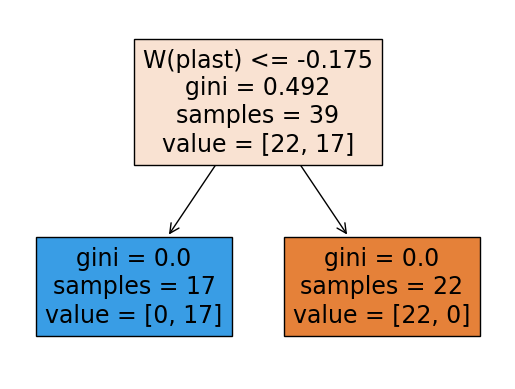

In [38]:
from sklearn.tree import plot_tree 

plot_tree(model_decision_tree, feature_names=['HU', 'F', 'F nach T', 'h', 'CHU', 'h(max)', 'h(min)', 'W(plast)',
       'W(elast)', 'Nu'], filled=True);

In [39]:
from sklearn.neural_network import MLPClassifier

model_nn = MLPClassifier(solver='lbfgs', alpha=0.1, hidden_layer_sizes=[5, 5])

model_nn.fit(X_train_skaliert, y_train)

score_train = model_nn.score(X_train_skaliert, y_train)
score_test = model_nn.score(X_test_skaliert, y_test)

print(f'Score Trainingsdaten: {score_train}')
print(f'Score Testdaten: {score_train}')


Score Trainingsdaten: 1.0
Score Testdaten: 1.0


## Regression



In [40]:
X_train, X_test, y_train, y_test = train_test_split(data, y_Haertewert)

In [41]:
from sklearn.linear_model import LinearRegression

model_lin_reg = LinearRegression()


model_lin_reg.fit(X_train_skaliert, y_train)

score_train = model_lin_reg.score(X_train_skaliert, y_train)
score_test = model_lin_reg.score(X_test_skaliert, y_test)

print(f'Score Trainingsdaten: {score_train}')
print(f'Score Testdaten: {score_train}')

Score Trainingsdaten: 0.11215219452611025
Score Testdaten: 0.11215219452611025


In [42]:
from sklearn.svm import SVR

model_svr = SVR()


model_svr.fit(X_train_skaliert, y_train)

score_train = model_svr.score(X_train_skaliert, y_train)
score_test = model_svr.score(X_test_skaliert, y_test)

print(f'Score Trainingsdaten: {score_train}')
print(f'Score Testdaten: {score_train}')

Score Trainingsdaten: 0.010867760768731305
Score Testdaten: 0.010867760768731305


In [43]:
from sklearn.tree import DecisionTreeRegressor

model_decision_tree_regression = DecisionTreeRegressor()

model_decision_tree_regression.fit(X_train_skaliert, y_train)

score_train = model_decision_tree_regression.score(X_train_skaliert, y_train)
score_test = model_decision_tree_regression.score(X_test_skaliert, y_test)

print(f'Score Trainingsdaten: {score_train}')
print(f'Score Testdaten: {score_train}')

Score Trainingsdaten: 1.0
Score Testdaten: 1.0


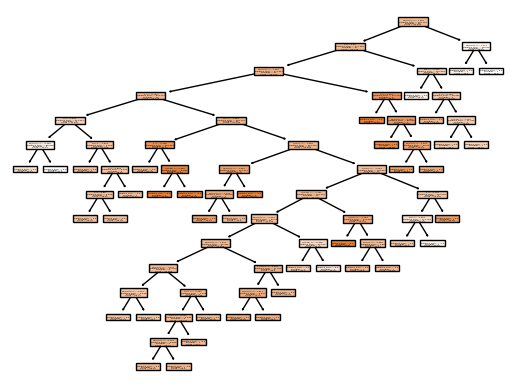

In [44]:
plot_tree(model_decision_tree_regression, feature_names=['HU', 'F', 'F nach T', 'h', 'CHU', 'h(max)', 'h(min)', 'W(plast)',
       'W(elast)', 'Nu'], filled=True);

In [45]:
from sklearn.neural_network import MLPRegressor

model_nn_regression = MLPRegressor()

model_nn_regression.fit(X_train_skaliert, y_train)

score_train = model_nn_regression.score(X_train_skaliert, y_train)
score_test = model_nn_regression.score(X_test_skaliert, y_test)

print(f'Score Trainingsdaten: {score_train}')
print(f'Score Testdaten: {score_train}')

Score Trainingsdaten: -3.833132118769389
Score Testdaten: -3.833132118769389


/opt/homebrew/Caskroom/miniconda/base/envs/python310/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:692: ConvergenceWarning:

Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

